In [15]:
using HDF5
using Plots
#using GR

function read_snap(filename :: String)
    
    pos  = h5read(filename,"PartType0/Coordinates")
    Bfl  = h5read(filename,"PartType0/Bfield") 
    Vel  = h5read(filename,"PartType0/Velocities")
    alp  = h5read(filename,"PartType0/EPalpha")
    bet  = h5read(filename,"PartType0/EPbeta")
    divB = h5read(filename,"PartType0/divB")
    #Ids  = h5read(filename,"PartType0/ParticleIDs")
    h    = h5read(filename,"PartType0/SmoothingLengths")
    rho  = h5read(filename,"PartType0/Densities")
    u    = h5read(filename,"PartType0/InternalEnergies")
    P    = h5read(filename,"PartType0/Pressures")
    head = h5readattr(filename,"Header")
    
    print("Leyendo ",filename," at time: ",head["Time"],"\n")
    x = pos[1,:]
    y = pos[2,:]
    z = pos[3,:]
    bx = Bfl[1,:]
    by = Bfl[2,:]
    bz = Bfl[3,:]
    Vx = Vel[1,:]
    Vy = Vel[2,:]
    Vz = Vel[3,:]
    
    v2 = Vx.*Vx.+Vy.*Vy.+Vz.*Vz
    b2 = by.*by.+by.*by.+bz.*bz
    
    Npart=size(b2,1)
        
    print("Min x:",minimum(x)," / Max x:",maximum(x),"\n")
    print("Min y:",minimum(y)," / Max y:",maximum(y),"\n")
    print("Min z:",minimum(z)," / Max z:",maximum(z),"\n")
    print("Min h:",minimum(h)," / Max h:",maximum(h),"\n")
    print("Min B2:",minimum(b2)," / Max B2:",maximum(b2),"\n")
    (Dict(:H => head, :x=>pos, :bfl=> Bfl, :b2=>b2, :v=>Vel, :v2=>v2, 
            :divB=>divB, :rho=>rho, :hsml=>h,:bet=> bet, :alp=>alp, 
            :Pres=> P, u=>u, :Npart=> Npart))
end

function do_heat(data,what,Nmax)
    #Nmax=128
    #x=x.-minimum(x)
    #y=y.-minimum(y)
    #b2=data[what]
    b2=what
    Npart=size(b2,1)
    Lbox=1.0#+maximum(x)
    A = ones((Nmax, Nmax))*minimum(b2)
    grid = ones((Nmax, Nmax))
    #grid = [Set{Int}() for x=1:Nmax, y=1:Nmax];
    #insert(grid) = p -> push!(grid[trunc(Int, p.x/Lbox*Nmax), trunc(Int, p.y/Lbox*Nmax)], p.n);
    #foreach(insert(grid), data)
    x=data[:x][2,:]
    y=data[:x][1,:]
    for ind = 1:Npart
        i,j = trunc(Int, x[ind]/Lbox*Nmax+1), trunc(Int, y[ind]/Lbox*Nmax+1)
        A[i,j] += b2[ind]
        grid[i,j] += 1 
    end
    #AA=log10.(A./grid)
    AA=(A./grid)
    (AA)
end

do_heat (generic function with 1 method)

In [16]:
#filename="OrszagTangVortex_0002.hdf5"
#base=read_snap("NO_FORCE/OrszagTangVortex_0005.hdf5")
#run=read_snap("OrszagTangVortex_0005.hdf5")

Leyendo OrszagTangVortex_0002.hdf5 at time: [0.2]
Min x:1.3690303811148796e-6 / Max x:0.9999995285230993
Min y:7.369821358547066e-9 / Max y:0.9999995970857436
Min z:5.7428705088746176e-8 / Max z:0.041666640190437795
Min h:0.0023264643 / Max h:0.0044652247
Min B2:1.5510027e-9 / Max B2:0.7175881


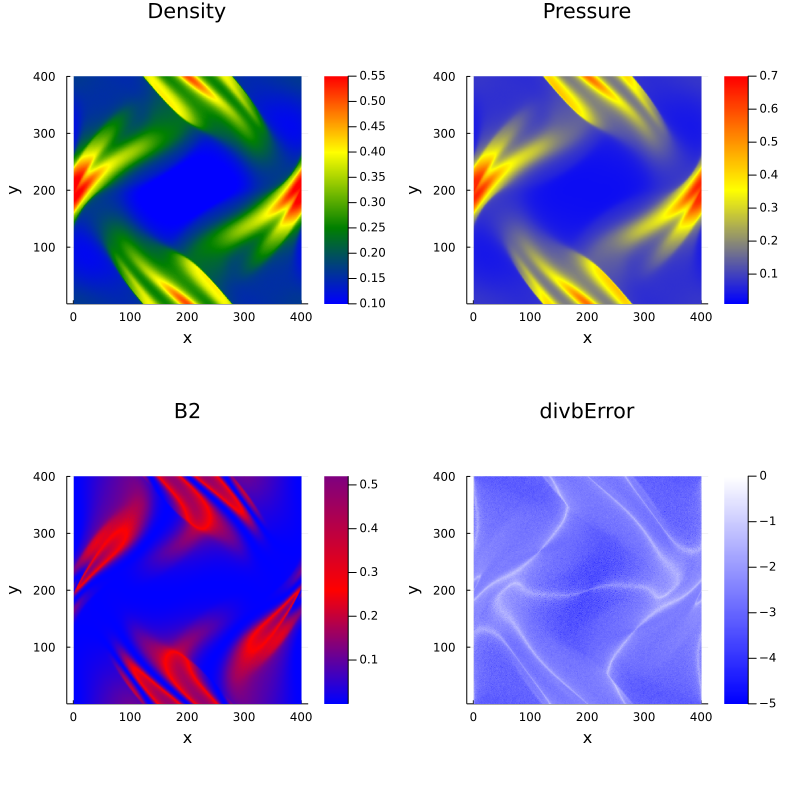

In [60]:
#using Plots
#gr()
run=read_snap("OrszagTangVortex_0002.hdf5")
Nmax =400
#AA   =do_heat(run,run[:bfl][3,:],Nmax)
EdivB=run[:hsml].*run[:divB] ./ sqrt.(run[:b2])
EdivB = log10.(abs.(EdivB))
#EdivB=run[:b2]
#EdivB=EdivB/sqrt.(run[:b2].+1E-5)
#AA   =do_heat(run,run[:bfl][1,:],Nmax)
bb=run[:bfl]
#bb=run[:v]
#AA   =do_heat(run,bb[2,:],Nmax)
#AA   =do_heat(run,(run[:Pres]),Nmax)

#GR.heatmap(1:Nmax,1:Nmax,AA,color=cgrad([:blue,:green,:yellow,:red]),xlabel="x", ylabel="y",clim=[0.01,0.7])
#subplot(2,2,1)
AA   =do_heat(run,(run[:rho]),Nmax)
h1=heatmap(1:Nmax,1:Nmax,AA,xlabel="x", ylabel="y",aspect_ratio=:equal,color=cgrad([:blue,:green,:yellow,:red]),clim=(0.1,0.55),size=(400,400))
AA   =do_heat(run,(run[:Pres]),Nmax)
h2=heatmap(1:Nmax,1:Nmax,AA,xlabel="x", ylabel="y",aspect_ratio=:equal,color=cgrad([:blue,:yellow,:red]),clim=(0.01,0.7),size=(400,400))
AA   =do_heat(run,(run[:b2]),Nmax)
h3=heatmap(1:Nmax,1:Nmax,AA,xlabel="x", ylabel="y",aspect_ratio=:equal,color=cgrad([:blue,:red, :purple]),size=(400,400))
AA   =do_heat(run,(EdivB),Nmax)
h4=heatmap(1:Nmax,1:Nmax,AA,xlabel="x", ylabel="y",aspect_ratio=:equal,color=cgrad([:blue,:white]),clim=(-5.0,0.0),size=(400,400))

plot(h1,h2,h3,h4,layout=4,size=(800,800),title=["Density" "Pressure" "B2" "divbError"])
#savefig("Vort.png")

Leyendo OrszagTangVortex_0005.hdf5 at time: [0.5]
Min x:1.3467898299368564e-7 / Max x:0.9999996085944706
Min y:2.8404399410320025e-7 / Max y:0.9999999055456524
Min z:2.9969488973824454e-9 / Max z:0.04166665452497696
Min h:0.0024831495 / Max h:0.0044242158
Min B2:9.906085e-10 / Max B2:1.1711663


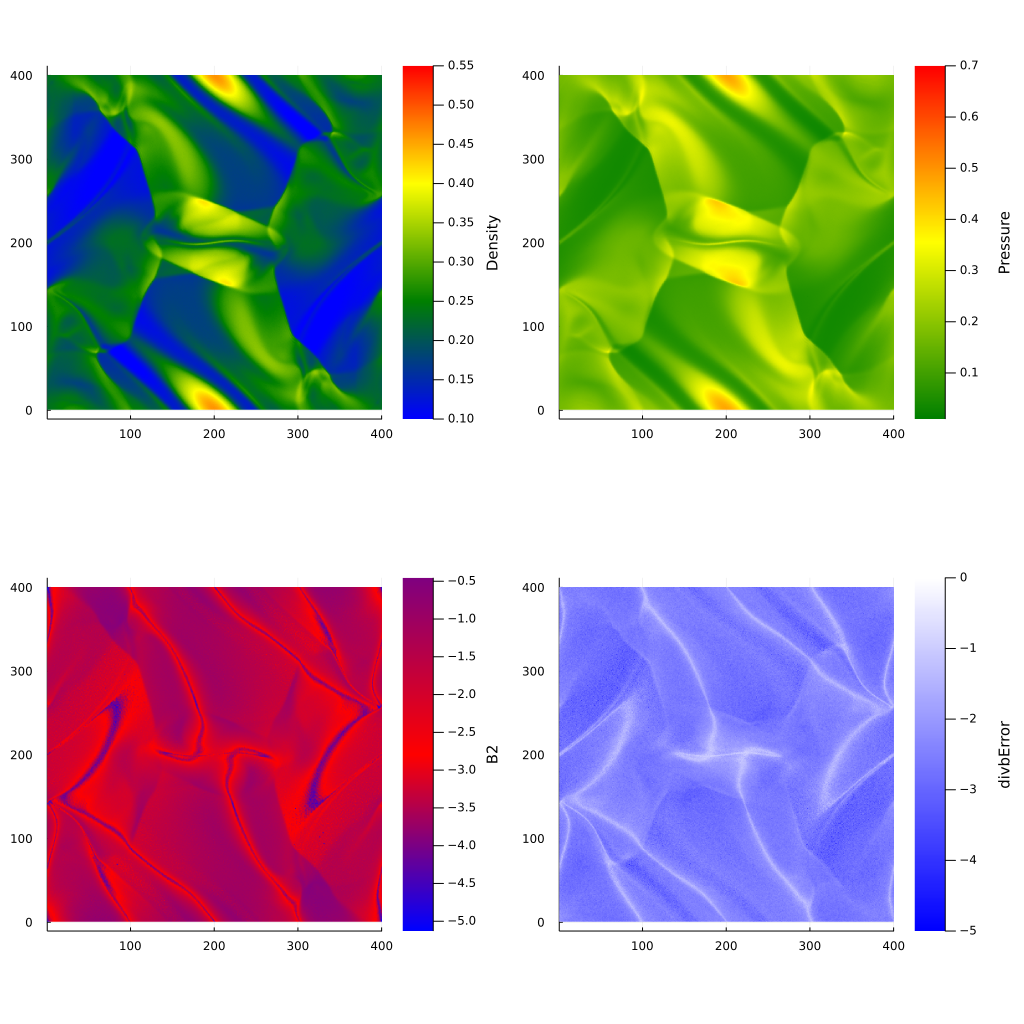

In [84]:
run=read_snap("OrszagTangVortex_0005.hdf5")
Nmax =400
EdivB=run[:hsml].*run[:divB] ./ sqrt.(run[:b2])
EdivB = log10.(abs.(EdivB))
bb=run[:bfl]
gr()
AA   =do_heat(run,(run[:rho]),Nmax)
h1=heatmap(1:Nmax,1:Nmax,AA,color=cgrad([:blue,:green,:yellow,:red]),clim=(0.1,0.55),colorbar=:left)
AA   =do_heat(run,(run[:Pres]),Nmax)
h2=heatmap(1:Nmax,1:Nmax,AA,color=cgrad([:green,:yellow,:red]),clim=(0.01,0.7))
AA   =do_heat(run,log10.(run[:b2]),Nmax)
h3=heatmap(1:Nmax,1:Nmax,AA,color=cgrad([:blue, :red, :purple]))
AA   =do_heat(run,(EdivB),Nmax)
h4=heatmap(1:Nmax,1:Nmax,AA,color=cgrad([:blue,:white]),clim=(-5.0,0.0))

plot(h1,h2,h3,h4,layout=4,size=(1024,1024),aspect_ratio=:equal,colorbar_title=["Density" "Pressure" "B2" "divbError"],colorbar=[:left :top :left :right])
#savefig("Vort.png")

In [95]:
gr()
Nmax=128
EdivB=base[:hsml].*base[:divB]
EdibB=base[:b2]
#ABase=do_heat(base,base[:bfl][1,:],Nmax)
ABase=do_heat(base,base[:b2],Nmax)
heatmap(1:Nmax,1:Nmax,ABase,c=cgrad([:blue,:green,:yellow,:red]),xlabel="x", ylabel="y")

LoadError: UndefVarError: base not defined

Leyendo OrszagTangVortex_0000.hdf5 at time: [0.0]
Min x:2.127160264396577e-6 / Max x:0.999999891062553
Min y:8.013688553368259e-7 / Max y:0.9999958223591977
Min z:5.432824003781533e-6 / Max z:0.999995444904396
Min h:0.019249799 / Max h:0.019416662


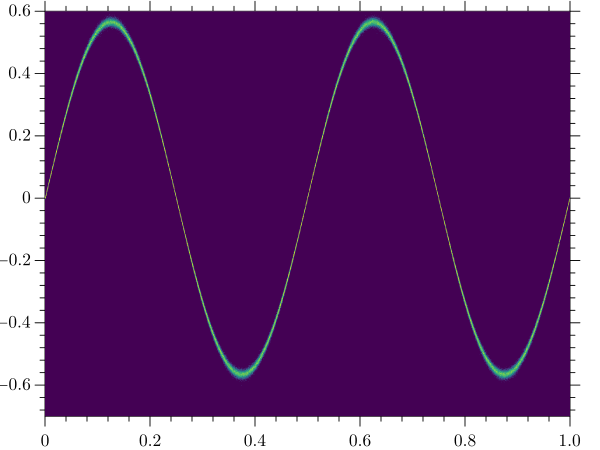

In [29]:

run=read_snap("OrszagTangVortex_0000.hdf5")
xx=run[:x]
yy=run[:bfl]
shade(xx[1,:],yy[2,:])

In [526]:
print(minimum(run[:alp]),"\n")
print(minimum(run[:bet]),"\n")
print(maximum(run[:alp]),"\n")
print(maximum(run[:bet]),"\n")
print(minimum(run[:v][1,:]),"\n")
print(minimum(run[:v][3,:]),"\n")
print(maximum(run[:v][1,:]),"\n")
print(maximum(run[:v][3,:]),"\n")

-0.08979354
-0.00019832367
0.089790516
1.0001271
-4.29732
-2.0130806
3.6721537
1.964809


In [55]:
a=[10,1]
log10.(a)


2-element Vector{Float64}:
 1.0
 0.0